In [1]:
## import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn import preprocessing 
from sklearn import svm
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

2024-02-25 02:38:00.358429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## Load Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: >

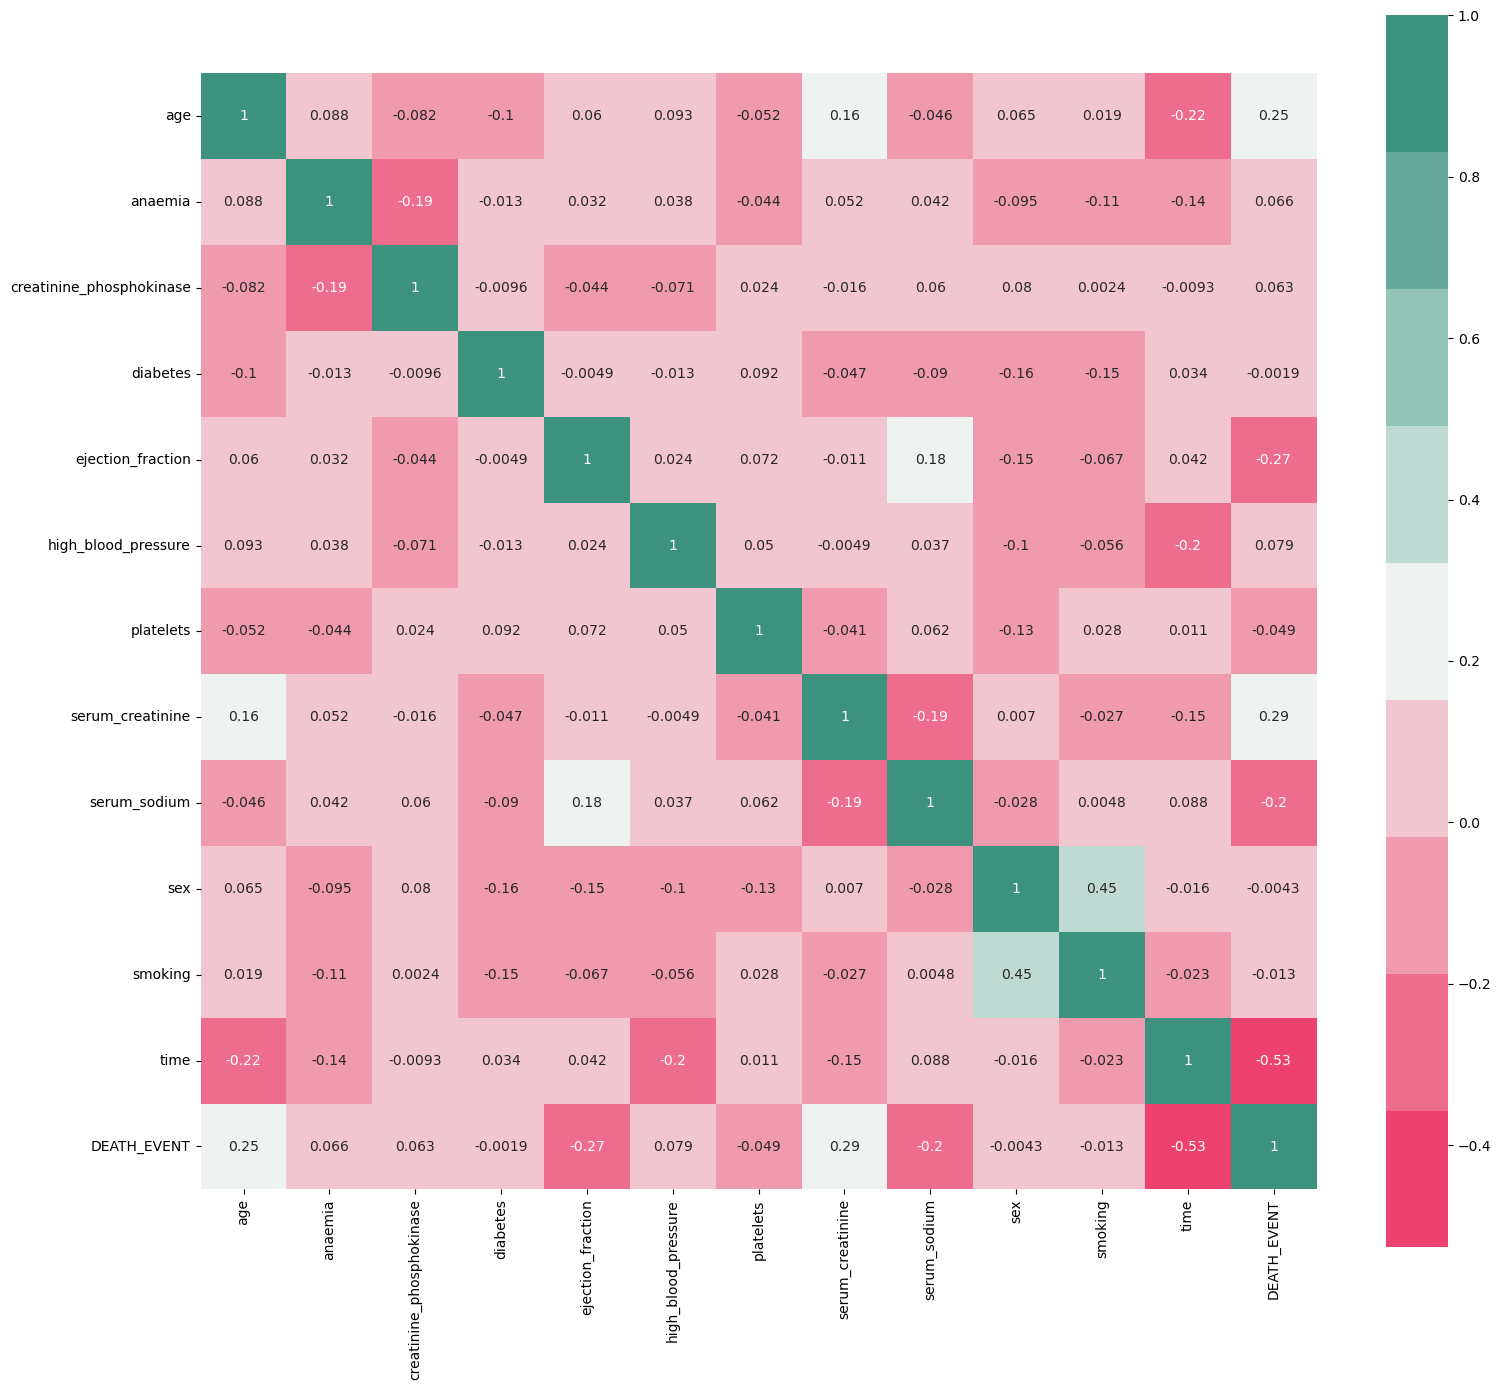

In [5]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,16))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [23]:
## data processing 
x= df.iloc[:,0:12]
y= df.iloc[:,12]

col_names = list(x.columns)
s_scaler =preprocessing.StandardScaler()
x_scaled= s_scaler.fit_transform(x)
x_scaled= pd.DataFrame(x_scaled, columns= col_names)
x_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y, test_size=0.50, random_state=30)

In [27]:
# Instantiating the SVM algorithm 
model_1=svm.SVC()

# Fitting the model 
model_1.fit(x_train, y_train)

# Predicting the test variables
y_pred = model_1.predict(x_test)

# Getting the score 
model_1.score (x_test, y_test)

0.8133333333333334

In [28]:
## printing the classification report
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.81      0.58      0.67        50

    accuracy                           0.81       150
   macro avg       0.81      0.76      0.77       150
weighted avg       0.81      0.81      0.80       150



<Axes: >

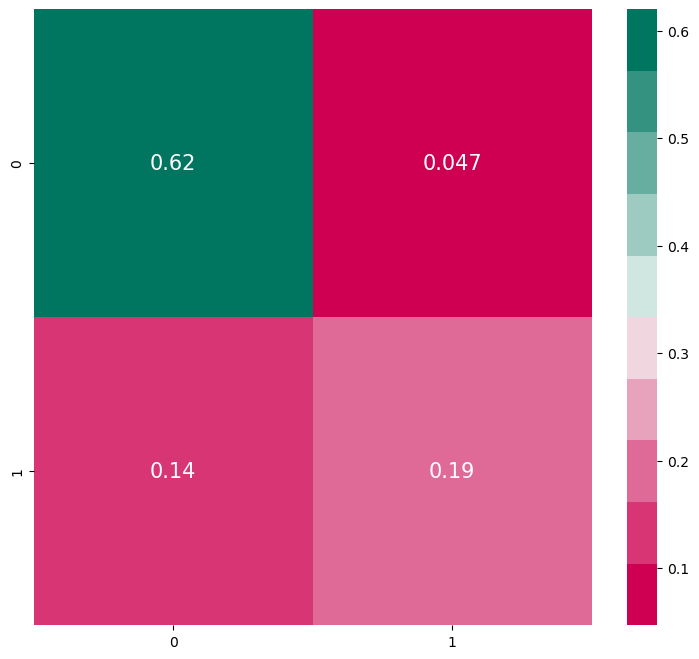

In [29]:
## building the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=100, l=44, n=10)
plt.subplots(figsize=(9,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [32]:
## ANN 
## build the tensorflow model
model= Sequential([Dense(units=32,input_shape=(12,), activation='relu'),
                   Dense(units=16, activation='relu'),
                   Dense(units=16,activation='relu'),
                   Dense(units=1, activation='sigmoid')])

## prepare the model for training through the compile function by using the mos common optimizer ADAM
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history= model.fit(x_train,y_train,batch_size=20, epochs=60, validation_split=0.5)



Epoch 1/60
4/4 [==============================] - 4s 197ms/step - loss: 0.6983 - accuracy: 0.5270 - val_loss: 0.7100 - val_accuracy: 0.5200
Epoch 2/60
4/4 [==============================] - 0s 31ms/step - loss: 0.6728 - accuracy: 0.6892 - val_loss: 0.6992 - val_accuracy: 0.5600
Epoch 3/60
4/4 [==============================] - 0s 35ms/step - loss: 0.6514 - accuracy: 0.7297 - val_loss: 0.6895 - val_accuracy: 0.6133
Epoch 4/60
4/4 [==============================] - 0s 31ms/step - loss: 0.6305 - accuracy: 0.7432 - val_loss: 0.6816 - val_accuracy: 0.6400
Epoch 5/60
4/4 [==============================] - 0s 27ms/step - loss: 0.6136 - accuracy: 0.7432 - val_loss: 0.6744 - val_accuracy: 0.6133
Epoch 6/60
4/4 [==============================] - 0s 33ms/step - loss: 0.5966 - accuracy: 0.7568 - val_loss: 0.6677 - val_accuracy: 0.6400
Epoch 7/60
4/4 [==============================] - 0s 36ms/step - loss: 0.5822 - accuracy: 0.7568 - val_loss: 0.6620 - val_accuracy: 0.6400
Epoch 8/60
4/4 [==========

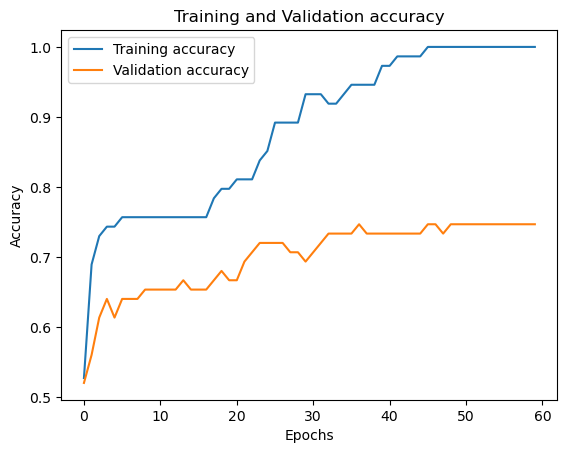

In [33]:
## visualise the trained data and the validation accuracy
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 5ms/step


<Axes: >

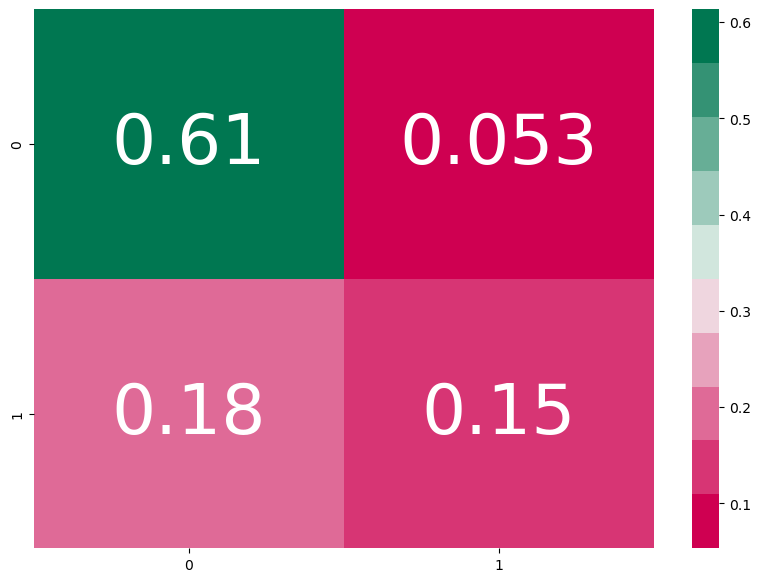

In [34]:
## building the confusion matrix after predicting the test results
y_pred= model.predict(x_test)
y_pred= (y_pred>0.5)
np.set_printoptions
cmap1 = sns.diverging_palette(2, 150, s=100, l=44, n=10)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':50})

In [35]:
## finally printing the classification report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.74      0.46      0.57        50

    accuracy                           0.77       150
   macro avg       0.76      0.69      0.70       150
weighted avg       0.76      0.77      0.75       150

